## 2D Terzaghi Transfer Learning (PINN)

This notebook contains incomplete code that attempts to use transfer learning to retrain the model for a range of parameters, with the hope to give an accurate pore pressure output for any parameter value. However, the weights are overwritten after each training. A fix was not found.

In [1]:
import os
import numpy as np 
import sciann as sn 
import pandas as pd
import matplotlib.pyplot as plt

from scianndatagen import DataGeneratorXYT
from sciann.utils.math import sign, abs, sigmoid, tanh, diff

---------------------- SCIANN 0.7.0.1 ---------------------- 
For details, check out our review paper and the documentation at: 
 +  "https://www.sciencedirect.com/science/article/pii/S0045782520307374", 
 +  "https://arxiv.org/abs/2005.08803", 
 +  "https://www.sciann.com". 

 Need support or would like to contribute, please join sciann`s slack group: 
 +  "https://join.slack.com/t/sciann/shared_invite/zt-ne1f5jlx-k_dY8RGo3ZreDXwz0f~CeA" 
 
TensorFlow Version: 2.10.0 
Python Version: 3.9.19 (main, May  6 2024, 20:12:36) [MSC v.1916 64 bit (AMD64)] 



In [2]:
s, minute, hr, day, year = 1., 60., 60.**2, 24*60.**2, 24*60.**2*365.25
mm, cm, m, km = 1e-3, 1e-2, 1.0, 1e3
Pa, kPa, MPa, GPa = 1.0, 1.e3, 1.e6, 1.e9

In [3]:
# ----------------------- Constant Parameters-------------------------
Lx = 4*m
Ly = 4*m
p0 = 1.0*Pa
p_star = 1.0*Pa

x_min, y_min = 0.,0.
x_max, y_max = 4.0,4.0
t_min, t_max = 0.,1.0

NUM_SAMPLES = 10000

In [4]:
# ----------------------- Neural Network Setup -----------------------
sn.reset_session()
sn.set_random_seed(1234)

xd = sn.Variable('xd', dtype='float64')
yd = sn.Variable('yd', dtype='float64')
td = sn.Variable('td', dtype='float64')

cx = sn.Variable('cx', dtype='float64')
cy = sn.Variable('cy', dtype='float64')

pd = sn.Functional('pd', [cx, cy, xd, yd, td], 8*[20], 'tanh')

In [5]:
# 2D Terzaghi Consolidation Problem
pd_x, pd_y, pd_t = diff(pd, xd), diff(pd, yd), diff(pd, td)
pd_xx = diff(pd_x, xd)
pd_yy = diff(pd_y, yd)

# PDE Equation and BCs
PDE_2D = cx*pd_xx + cy*pd_yy - pd_t

bc_ini = (td == t_min) * abs(pd - p0/p_star)
bc_left = (xd == x_min) * abs(pd_x)
bc_right = (xd == x_max) * abs(pd)
bc_bot = (yd == y_min) * abs(pd_y)
bc_top = (yd == y_max) * abs(pd)

targets_2D = [sn.PDE(PDE_2D), bc_ini, bc_left, bc_right, bc_bot, bc_top]

In [6]:
initial_lr = 1e-3
final_lr = initial_lr/10

model = sn.SciModel(
    [cx, cy, xd, yd, td],
    targets_2D,
    "mse",
    "Adam"
)

### Retraining Model

Training for cx=[0.4] and cy=[0.8]

Total samples: 11250 
Batch size: 5000 
Total batches: 3 

Epoch 1/20
3/3 - 0s - loss: 0.4927 - sub_loss: 0.0819 - mul_2_loss: 0.2556 - mul_3_loss: 0.0014 - mul_4_loss: 0.2707 - mul_5_loss: 0.0015 - mul_6_loss: 0.1131 - lr: 0.0010 - time: 0.0970 - 97ms/epoch - 32ms/step
Epoch 2/20
3/3 - 0s - loss: 0.5206 - sub_loss: 0.0055 - mul_2_loss: 0.0214 - mul_3_loss: 0.0011 - mul_4_loss: 0.2960 - mul_5_loss: 0.0013 - mul_6_loss: 0.2198 - lr: 8.9125e-04 - time: 0.1060 - 106ms/epoch - 35ms/step
Epoch 3/20
3/3 - 0s - loss: 0.2946 - sub_loss: 0.0314 - mul_2_loss: 0.1417 - mul_3_loss: 6.0941e-04 - mul_4_loss: 0.0952 - mul_5_loss: 1.7417e-04 - mul_6_loss: 0.0401 - lr: 7.9433e-04 - time: 0.1035 - 103ms/epoch - 34ms/step
Epoch 4/20
3/3 - 0s - loss: 0.4024 - sub_loss: 0.0626 - mul_2_loss: 0.3266 - mul_3_loss: 6.7459e-04 - mul_4_loss: 0.0036 - mul_5_loss: 3.8706e-04 - mul_6_loss: 0.0071 - lr: 7.0795e-04 - time: 0.0982 - 98ms/epoch - 33ms/step
Epoch 5/20
3/3 - 0s - loss:

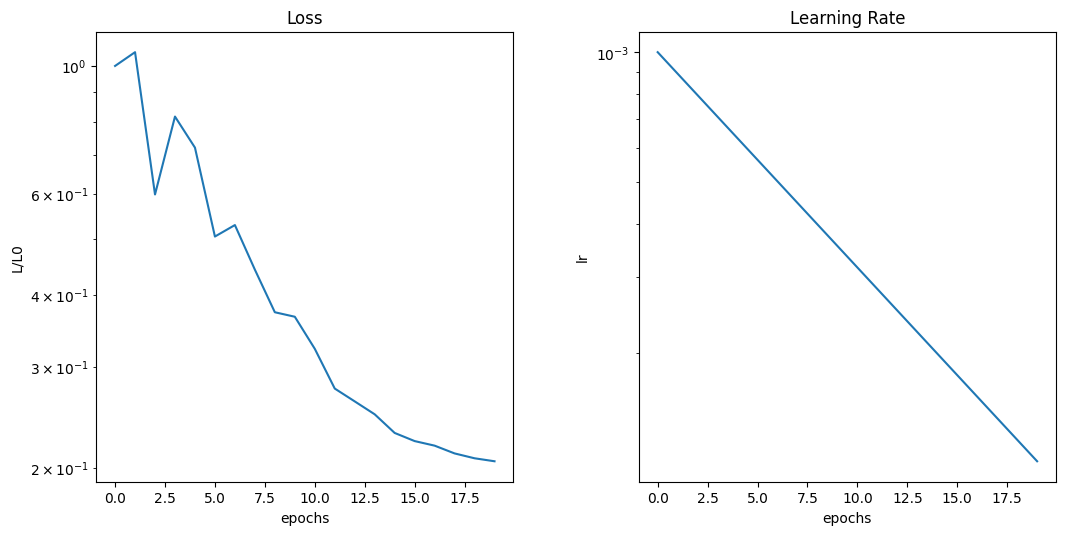

Training for cx=[0.4] and cy=[1.]

Total samples: 11250 
Batch size: 5000 
Total batches: 3 

Epoch 1/20
3/3 - 0s - loss: 0.2092 - sub_loss: 0.0159 - mul_2_loss: 0.0314 - mul_3_loss: 3.2500e-04 - mul_4_loss: 0.0842 - mul_5_loss: 1.8151e-04 - mul_6_loss: 0.0737 - lr: 0.0010 - time: 0.0957 - 96ms/epoch - 32ms/step
Epoch 2/20
3/3 - 0s - loss: 0.1944 - sub_loss: 0.0366 - mul_2_loss: 0.1237 - mul_3_loss: 0.0013 - mul_4_loss: 0.0168 - mul_5_loss: 4.6015e-04 - mul_6_loss: 0.0305 - lr: 8.9125e-04 - time: 0.1035 - 104ms/epoch - 35ms/step
Epoch 3/20
3/3 - 0s - loss: 0.1213 - sub_loss: 0.0123 - mul_2_loss: 0.0517 - mul_3_loss: 4.4340e-04 - mul_4_loss: 0.0142 - mul_5_loss: 2.6029e-04 - mul_6_loss: 0.0471 - lr: 7.9433e-04 - time: 0.1050 - 105ms/epoch - 35ms/step
Epoch 4/20
3/3 - 0s - loss: 0.1391 - sub_loss: 0.0076 - mul_2_loss: 0.0324 - mul_3_loss: 9.3030e-05 - mul_4_loss: 0.0380 - mul_5_loss: 2.9684e-04 - mul_6_loss: 0.0643 - lr: 7.0795e-04 - time: 0.0998 - 100ms/epoch - 33ms/step
Epoch 5/20
3/3 

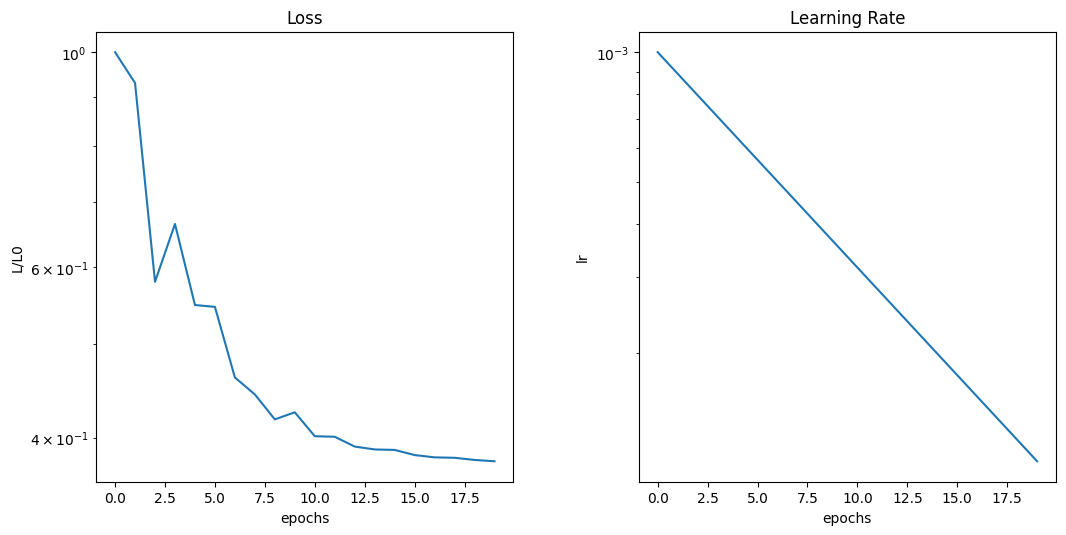

Training for cx=[0.4] and cy=[1.2]

Total samples: 11250 
Batch size: 5000 
Total batches: 3 

Epoch 1/20
3/3 - 0s - loss: 0.2147 - sub_loss: 0.0068 - mul_2_loss: 0.0378 - mul_3_loss: 2.0109e-04 - mul_4_loss: 0.0878 - mul_5_loss: 1.3407e-04 - mul_6_loss: 0.0580 - lr: 0.0010 - time: 0.0931 - 93ms/epoch - 31ms/step
Epoch 2/20
3/3 - 0s - loss: 0.2047 - sub_loss: 0.0197 - mul_2_loss: 0.1168 - mul_3_loss: 3.4012e-04 - mul_4_loss: 0.0351 - mul_5_loss: 5.1930e-04 - mul_6_loss: 0.0250 - lr: 8.9125e-04 - time: 0.0972 - 97ms/epoch - 32ms/step
Epoch 3/20
3/3 - 0s - loss: 0.1199 - sub_loss: 0.0058 - mul_2_loss: 0.0417 - mul_3_loss: 1.3772e-04 - mul_4_loss: 0.0227 - mul_5_loss: 1.5096e-04 - mul_6_loss: 0.0432 - lr: 7.9433e-04 - time: 0.1066 - 108ms/epoch - 36ms/step
Epoch 4/20
3/3 - 0s - loss: 0.1231 - sub_loss: 0.0049 - mul_2_loss: 0.0285 - mul_3_loss: 2.2513e-04 - mul_4_loss: 0.0454 - mul_5_loss: 1.2744e-04 - mul_6_loss: 0.0547 - lr: 7.0795e-04 - time: 0.1021 - 103ms/epoch - 34ms/step
Epoch 5/20


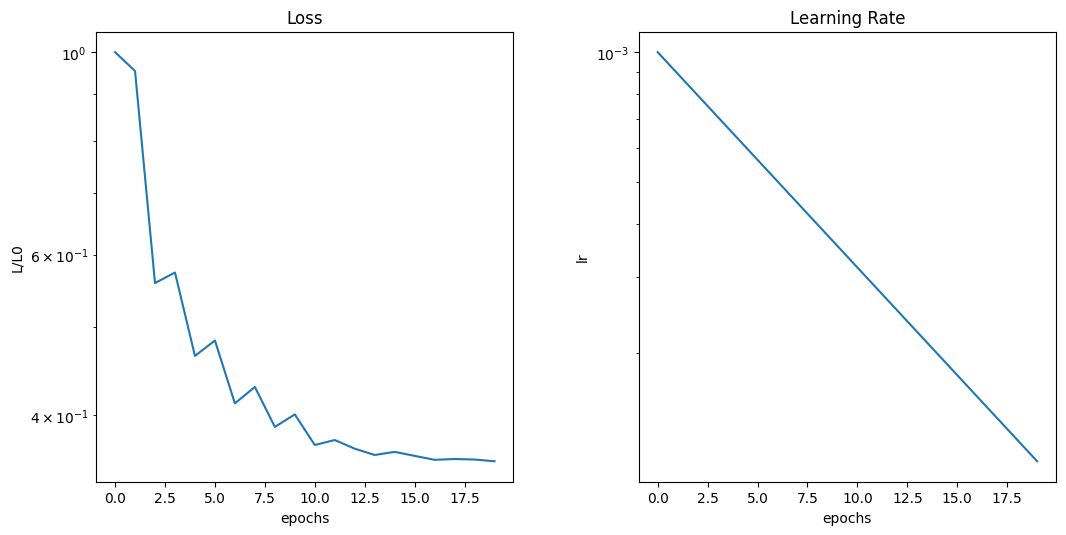

Training for cx=[0.6] and cy=[0.8]

Total samples: 11250 
Batch size: 5000 
Total batches: 3 

Epoch 1/20
3/3 - 0s - loss: 0.2191 - sub_loss: 0.0392 - mul_2_loss: 0.0984 - mul_3_loss: 0.0017 - mul_4_loss: 0.0498 - mul_5_loss: 0.0013 - mul_6_loss: 0.0194 - lr: 0.0010 - time: 0.0949 - 95ms/epoch - 32ms/step
Epoch 2/20
3/3 - 0s - loss: 0.1681 - sub_loss: 0.0142 - mul_2_loss: 0.0239 - mul_3_loss: 0.0026 - mul_4_loss: 0.0834 - mul_5_loss: 4.0144e-04 - mul_6_loss: 0.0463 - lr: 8.9125e-04 - time: 0.1102 - 110ms/epoch - 37ms/step
Epoch 3/20
3/3 - 0s - loss: 0.1117 - sub_loss: 0.0163 - mul_2_loss: 0.0688 - mul_3_loss: 0.0011 - mul_4_loss: 0.0189 - mul_5_loss: 8.0643e-04 - mul_6_loss: 0.0116 - lr: 7.9433e-04 - time: 0.0999 - 100ms/epoch - 33ms/step
Epoch 4/20
3/3 - 0s - loss: 0.1220 - sub_loss: 0.0245 - mul_2_loss: 0.0837 - mul_3_loss: 3.5658e-04 - mul_4_loss: 0.0049 - mul_5_loss: 4.6039e-04 - mul_6_loss: 0.0114 - lr: 7.0795e-04 - time: 0.1000 - 100ms/epoch - 33ms/step
Epoch 5/20
3/3 - 0s - loss


KeyboardInterrupt



In [26]:
NUM_SAMPLES = 10000

# Generate the training data
dg = DataGeneratorXYT(
    X=[x_min, x_max],
    Y=[y_min, y_max],
    T=[t_min, t_max],
    targets=['domain', 'ic', 'bc-left', 'bc-right', 'bc-bot', 'bc-top'],
    num_sample=NUM_SAMPLES,
)
input_data_2D, target_data_2D = dg.get_data()
cx_value = [0.4, 0.6, 0.8]
cy_value = [0.8, 1.0, 1.2]

for cx in cx_value:
    for cy in cy_value:
        cx = np.full_like(input_data_2D[0], cx)
        cy = np.full_like(input_data_2D[0], cy)
        
        if cx[0] == 0.4 and cy[0] == 0.8:
            epochs = 20
            batch_size = 5000
            
            learning_rate = {
            "scheduler": "ExponentialDecay", 
            "initial_learning_rate": initial_lr,
            "final_learning_rate": final_lr, 
            "decay_epochs": epochs
        }
            stop_loss_value = 5e-4
            
        else:
            epochs = 20
            batch_size = 5000

            learning_rate = {
            "scheduler": "ExponentialDecay", 
            "initial_learning_rate": initial_lr,
            "final_learning_rate": final_lr, 
            "decay_epochs": epochs
        }
            stop_loss_value = 3e-4
    
        print(f'Training for cx={cx[0]} and cy={cy[0]}')

        H = model.train(
            [cx, cy, input_data_2D[0], input_data_2D[1], input_data_2D[2]],
            target_data_2D,
            epochs=epochs,
            batch_size=batch_size,
            learning_rate=learning_rate,
            stop_loss_value=stop_loss_value, # change?
            stop_after=None,
            verbose=2
        )
        model.save_weights('Terzaghi_2D_TL.hdf5')

        loss = H.history["loss"]
        learning_rate = H.history["lr"]

        def cust_semilogx(AX, X, Y, xlabel, ylabel, title):
            if X is None:
                im = AX.semilogy(Y)
            else:
                im = AX.semilogy(X, Y)
            if xlabel is not None: AX.set_xlabel(xlabel)
            if ylabel is not None: AX.set_ylabel(ylabel)
            if title is not None: AX.set_title(title)

        fig, ax = plt.subplots(1, 2, figsize=(12, 6))

        cust_semilogx(ax[0], None, np.array(loss) / loss[0], "epochs", "L/L0", "Loss")
        cust_semilogx(ax[1], None, np.array(learning_rate), "epochs", "lr", "Learning Rate")

        fig.subplots_adjust(left=0.1, right=0.9, bottom=0.15, top=0.9, wspace=0.3, hspace=0.2)
        plt.savefig(f'Epochs_2D_{cx[0]}_{cy[0]}.png',dpi=600)
        plt.show()

### Testing the Model

In [11]:
# Define the evaluation grid
N = 50
zs = np.linspace(y_min, y_max, N)
xs = np.linspace(x_min, x_max, N)
ts = np.linspace(t_min, t_max, N)

ZTest, XTest = np.meshgrid(zs, xs, indexing='ij')

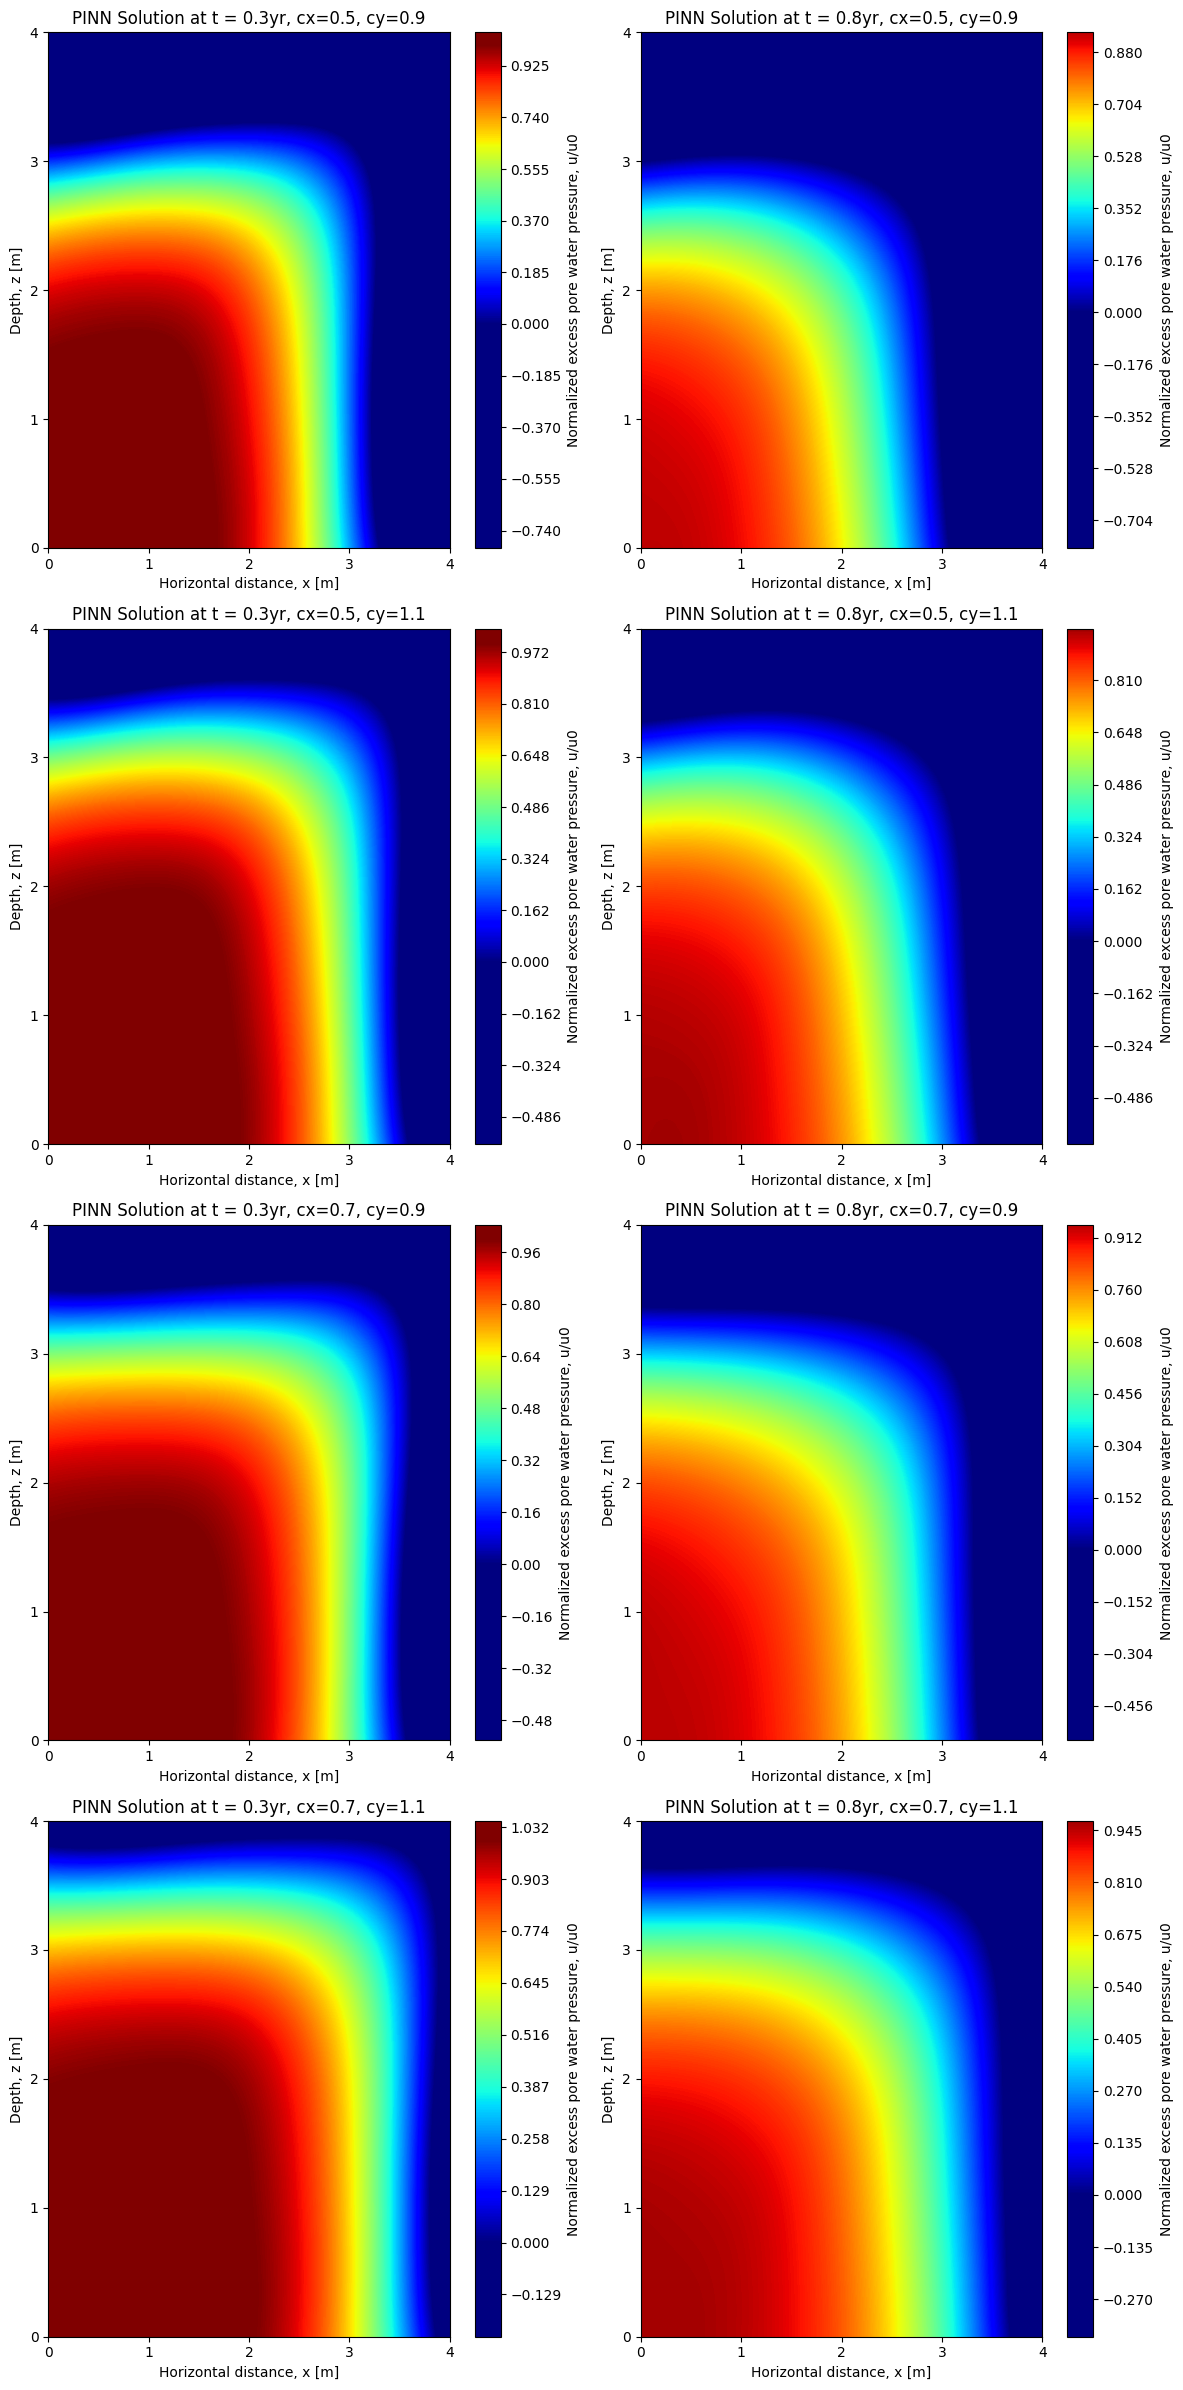

In [23]:
# Time points to plot
time_points = [0.3, 0.8]

# Create a 2-row figure (one row for each time point)
fig, axes = plt.subplots(4, 2, figsize=(12, 24))  # 4 rows, 2 columns

# Initialize a row counter
row_idx = 0

for cx in [0.5, 0.7]:
    for cy in [0.9, 1.1]:
        for i, time_point in enumerate(time_points):
            # Get the corresponding time index
            time_index = int((time_point - t_min) / (t_max - t_min) * (N - 1))
            input_test = [ZTest.flatten(), XTest.flatten(), np.full_like(XTest.flatten(), ts[time_index])]
            
            # Create cx and cy values with the correct shape
            cx_val = np.full_like(input_test[0], cx)
            cy_val = np.full_like(input_test[0], cy)
                
            # Evaluate the model to get predictions
            p_pred_contour = pd.eval(model, [cx_val, cy_val, input_test[0], input_test[1], input_test[2]]).reshape(XTest.shape)
            
            # Determine the correct position in the subplot grid (row, column)
            ax = axes[row_idx, i]  # row is controlled by cx/cy combo, i controls time point (columns)

            # Plot the predicted pressure contour
            c0 = ax.contourf(XTest, ZTest, p_pred_contour, levels=900, cmap='jet', vmin=0, vmax=1)
            fig.colorbar(c0, ax=ax, label='Normalized excess pore water pressure, u/u0')
            ax.set_title(f'PINN Solution at t = {time_point}yr, cx={cx}, cy={cy}')
            ax.set_xlabel('Horizontal distance, x [m]')
            ax.set_ylabel('Depth, z [m]')
            ax.invert_yaxis()
            ax.set_xlim(0, 4)
            ax.set_ylim(0, 4)
            ax.set_xticks(np.arange(0, 5, 1))
            ax.set_yticks(np.arange(0, 5, 1))

        # Move to the next row for the next cx, cy combination
        row_idx += 1

# Adjust layout and display
plt.tight_layout()
plt.savefig(f'ContourPlots_2D.png')
plt.show()